# Lab: Linear Regression

## Libraries / Data

Basic imports and Boston dataset loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv('../datasets/boston.csv', index_col=False)

In order to fit a multiple linear regression model using least squares, we again use the `OLS` function.

In [2]:
import statsmodels.api as sm
X = boston[['lstat', 'age']]
X = sm.add_constant(X)
y = boston.medv

model = sm.OLS(y, X)
results = model.fit()

The `summary` function now outputs the regression coefficients for all the predictors

In [3]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           2.98e-88
Time:                        19:41:26   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can access the individual components of a summary:

In [4]:
print('R2 = {}'.format(results.rsquared))
print('RSE = {}'.format(np.sum(results.resid ** 2)))

R2 = 0.5512689379421002
RSE = 19168.128608760813


The `variance_inflation_factor` function, can be used to compute variance inflation factors. Most VIF’s are low to moderate for this data.

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for (i, c) in enumerate(X.columns):
    print('feature {} VIF = {}'.format(c, variance_inflation_factor(X.values, i)))

feature const VIF = 7.0923776204616535
feature lstat VIF = 1.5693948005689597
feature age VIF = 1.569394800568959


__Interaction Terms__

We build the interaction terms by hand, for example where with __lstat__ and __age__

In [6]:
X['lstat_age'] = X.lstat * X.age

In [7]:
results = sm.OLS(y, X).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           4.86e-88
Time:                        19:41:27   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat_age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
for (i, c) in enumerate(X.columns):
    print('feature {} VIF = {}'.format(c, variance_inflation_factor(X.values, i)))

feature const VIF = 28.91663350446877
feature lstat VIF = 19.101861604800245
feature age VIF = 4.1828215105545645
feature lstat_age VIF = 29.300393096500233


Note: the inclusion of __lstat_age__ increases all VIF factors

__Non-linear transformations of the Predictors__

In [10]:
X = boston[['lstat']]
X['lstat_squared'] = np.square(X.lstat)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          1.56e-112
Time:                        19:41:27   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat_squared     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has colinearity but fits the data better than the linear model:

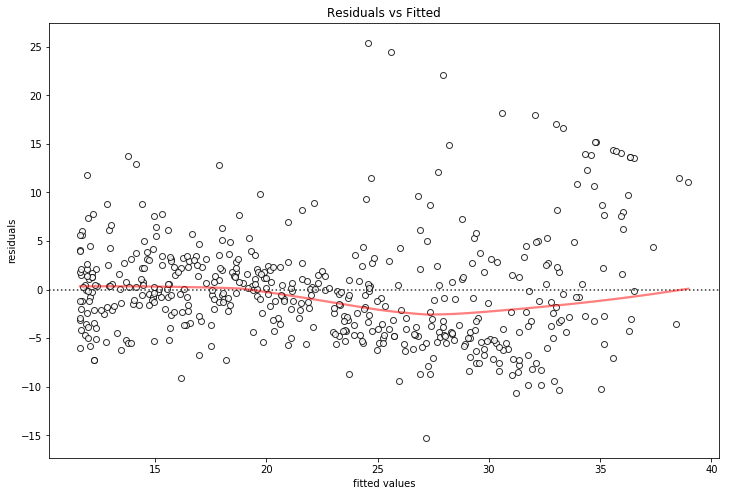

In [11]:
fitted = results.predict(X)
residuals = boston.medv - fitted
_, ax = plt.subplots(1, 1, figsize=(12, 8))
resid_line_kw = {'color':'red', 'alpha':0.5}
resid_scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}
sns.residplot(fitted, residuals, lowess=True, line_kws=resid_line_kw, scatter_kws=resid_scatter_kw, ax=ax)
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')
ax.set_title('Residuals vs Fitted');

__Qualitative Predictors__

We will now examine the Carseats data, which is part of the ISLR library. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [12]:
carseats = pd.read_csv('../datasets/carseats.csv', index_col=0)

The Carseats data includes qualitative predictors such as __Shelveloc__, an in- dicator of the quality of the shelving location, that is, the space within a store in which the car seat is displayed—at each location. The predictor __Shelveloc__ takes on three possible values: _Bad, Medium, and Good_.

In [13]:
carseats.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

Given a qualitative variable such as __Shelveloc__, [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) generates dummy variables. Below we fit a multiple regression model that includes some interaction terms:

In [14]:
loc_dummies = pd.get_dummies(carseats.ShelveLoc, prefix='loc')

In [15]:
withDummies = pd.concat([carseats, loc_dummies], axis=1) # add dummies to dataframe

In [16]:
# fit a model with dummy variables
y = withDummies.Sales
X = withDummies[['Income', 'Price', 'CompPrice', 'Advertising', 'Age','loc_Bad', 'loc_Good', 'loc_Medium']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          1.25e-170
Time:                        19:41:27   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8033      0.375     15.477      0.000       5.066       6.541
Income          0.0158      0.002      8.590      0.000       0.012       0.019
Price          -0.0953      0.003    -35.699      0.000      -0.101      -0.090
CompPrice       0.0926      0.004     22.451      0.000       0.084       0.101
Advertising     0.1159      0.008     15.006      0.000       0.101       0.131
Age            -0.0461      0.003    -14.521      0.000      -0.052      -0.040
loc_Bad        -0.3281      0.148     -2.214      0.027      -0.619      -0.037
loc_Good        4.5076      0.154     29.216      0.000       4.204       4.811
loc_Medium      1.6239      0.141     11.548      0.000       1.347       1.900
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     9.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""